# Intro to NLP

This notebook is designed for those of you that don't have a lot of experience with Python and / or building NLP models. Most of the work here will be focused around existing tools and frameworks that we can use to leverage some important topics that we have learned in the course such as word embeddings and simple statistical NLP classifiers.

# 1. Requirements

Run the cell below in order to install the requirements you need for executing the code in this lab session.

In [ ]:
!pip install pandas numpy scikit-learn

# 2. Transforming sentences into representations

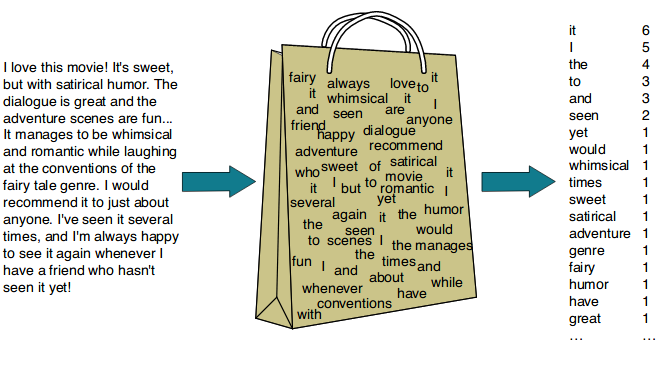

Now, we've seen some examples in the code that allow us to transform . One of the simplest but relatively effective approaches is the [Bag of Words](https://en.wikipedia.org/wiki/Bag-of-words_model) model.

Let's build a simple model that allows us to actually build a proper representation of a "corpus" of text. We're given the below sentences:

In [ ]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

The goal is to build a class called DocumentBowVectorizer that can take corpus in as an input and then can spit out the representation of any sentence. You'll be offered a couple of test sentences and their expected answer to see that your code actually works well.

Traditionally, the list of documents passed to the vectorizer is called a `corpus` and it provides a method called `fit` usually that takes in the list of documents and builds and internal representation of all words it encounters.

The second method we need to provide is `transform`, that takes in a new sentence and defines a vector for it. In case we've never seen this before, we can simply ignore it.

**Important:** 
You might want to treat uppercase and lowercase words the same way.

For removing punctuation, as it doesn't really encode any information for our use-case, we can use the following function, given `s` is a string:  

```py
sentence.translate(str.maketrans('','',string.punctuation))
```

In [ ]:
import string

class DocumentBowVectorizer:
    def __init__(self):
        self.features = [] # will be used to store the word index as it occurs
        
    def _normalize(self, sentence):
        return sentence.translate(str.maketrans('','',string.punctuation)).lower()
    
    def fit(self, data):
        """
        Takes a corpus (a list of sentences) and learns an internal representation
        """
        # YOUR CODE HERE
        pass
        
    def transform(self, sentence):
        """
        Takes a sentence and returns a vector based on the learned vocabulary.
        Returns a vector the length of the vocabulary.
        """
        # YOUR CODE HERE
        pass


### Challenge time

To see if your implementation is actually good enough, we're going to put it to the test. Let's train a document vectorizer based on what you provided and see if it does the job! Run the code below, it should match the expected output

In [ ]:
bow = DocumentBowVectorizer()
bow.fit(corpus)

# The below will throw an exception if your implementation is wrong
assert [1, 1, 1, 0, 2, 1, 0, 1, 0] == bow.transform('this third document is not the second document')
assert ['this', 'is', 'the', 'first', 'document', 'second', 'and', 'third', 'one'] == bow.features

# 3. Spam / not spam classification

Now let's see if our tokenizer is any good, and if it can be used to classify some data. We'll be using a dataset of 5000+ mails classified as spam or not spam.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
# Read the CSV using pandas, and store it in a dataframe. The encoding is "latin-1".

# YOUR CODE HERE. Name your variable df

### Exploratory analysis

Let's do some exploratory data analysis! That way we know what we're jumping into.

In [ ]:
df.head()

In [ ]:
df.spam.value_counts()

In [ ]:
df.spam.value_counts().plot(kind='bar')

### Challenge time!

Try to use our beautiful `DocumentBowVectorizer` in order to fit on the input data. If you're seeing it takes too long, maybe press the stop button and try with a restricted amount of the documents, let's say the first 100 or so.

In [ ]:
bow = DocumentBowVectorizer()
bow.fit(df.text[:100])

In [ ]:
# Print the features of the BoW vectorizer. What do you see?
# Is there a problem?? 

# YOUR CODE BELOW
print(bow.features)

### Bummer!

Well obviously this became a trickier problem the moment we started having too many words in our corpus! 

Luckily, some people that had more time than us thought about some smarter implementations. We can take a look at the amazing scikit-learn library, that allows us to 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

help(CountVectorizer)

These following pieces of information are pretty crucial as to why this might work better:

>  |  This implementation produces a sparse representation of the counts using
 |  scipy.sparse.csr_matrix.
 
 

### Classifier training 101

If you're new to this, you need to understand how to train your classifier. One very useful tool is splitting your data into training and testing data, stuff you train on and stuff you look at for the first time to see if your ML model actually works for anything more than your spoon-fed examples.



In [127]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# use train_test_split to get these 4 outputs: train_X, test_X, train_y, test_y
# make sure that the data gives you 20% test data and 80% train data.
# YOUR CODE HERE


In [ ]:
vect = CountVectorizer(stop_words="english")
vect.fit(train_X) 

In [ ]:
print(vect.get_feature_names_out()[:20]) # gets the first 20 features
print(vect.get_feature_names_out()[-20:]) # gets the last 20 features

In [ ]:
# store the transformed data into variables called X_train_df and X_test_df after processing the sentences

# YOUR CODE HERE
type(X_test_df) # let's check the type

In [ ]:
# We need to fit a MultinomialNB model, using a similar API to what our previous vectorizer would assume
# The fit functions gets the training matrix + the labels as input, so fit(X_train_df, train_y). Try to predict the data and see what accuracy we get.

# YOUR CODE HERE

# If you stored your predictions in "pred", this should work
accuracy_score(test_y, pred)

In [ ]:
print(classification_report(test_y, pred , target_names = ["Not Spam", "Spam"]))

### Let's see how this fares on some of the actual data


In [ ]:
print(df["text"][1472])
pred = model.predict(vect.transform(df["text"]))
print("Pred : ",pred[1472])
print("Main : ",df["spam"][1472])

In [ ]:
print(df["text"][10])
pred = model.predict(vect.transform(df["text"]))
print("Pred : ",pred[10])
print("Main : ",df["spam"][10])

The below should print **spam**

In [ ]:
pred = model.predict(vect.transform(["buy now you're sure to become rich from this amazing offer, just click on this link and all your dreams will come true"]))
print(f"Prediction: {'spam' if pred[0] == 1 else 'not spam'}")

# 4. Bonus: Using TF-IDF in order to get better predictions

Or will they really be like that? Let's try to compare the two approaches. TF-IDF should capture more meaning, so more is better right? We'll be looking at two separet implementations.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

Let's compare the two vectorizers by making use of the nifty [make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html#sklearn.pipeline.make_pipeline) function in sklearn.

This allows us to define several steps in our process so we don't need to worry about fitting the models individually.

In [ ]:
from sklearn.pipeline import make_pipeline
model_tfidf = make_pipeline(TfidfVectorizer(), MultinomialNB())
model_count = make_pipeline(CountVectorizer(), MultinomialNB())

In [ ]:
# Fit the models and store the predictions for both models in "y_pred_tfidf" and "y_pred_count".
# YOUR CODE HERE

### It's all about metrics
Well now that we've done our predictions, let's see what's going on!

Maybe something interesting happened (or maybe not).

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, ConfusionMatrixDisplay

accuracy = accuracy_score(test_y, y_pred_tfidf)
f1 = f1_score(test_y, y_pred_tfidf, average='weighted')

print('Multinomial Naive Bayes with TF-IDF:')
print('-' * 40)
print(f'f1: {f1:.4f}')
print(f'accuracy: {accuracy:.4f}')

accuracy = accuracy_score(test_y, y_pred_count)
f1 = f1_score(test_y, y_pred_count, average='weighted')

print('----')
print('Multinomial Naive Bayes with Count vectorizer:')
print('-' * 40)
print(f'f1: {f1:.4f}')
print(f'accuracy: {accuracy:.4f}')

In [ ]:
## Check out how to use ConfusionMatrixDisplay to show the predictions on the test data of both models

## YOUR CODE BELOW

### What conclusions can we draw from this?

Is TF-IDF that much worse, or do you think there's something else at play? Formulate your own hypothesis.